# Project2_Both_Group8_Yanan Dou_Shutian Song.ipynb

# Data Preprocessing

In [1]:
import pandas as pd

In [2]:
data1 = pd.read_csv('audit_risk.csv')
data1.head(20)
data1.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

In [3]:
data2 = pd.read_csv('trial.csv')
data2.head(20)
data2.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk'],
      dtype='object')

In [4]:
data1.shape
data2.shape

(776, 18)

In [5]:
data1.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [6]:
data2.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


We noticed that the columns "SCORE_A" "SCORE_B" in "trial.csv" are the same columns as "Score_A" "Score_B" in "audit_risk.csv" but the scale of data are different. We decided to choose the columns in "audit_risk.csv" and droped the 2 columns in the other file when merged the two dataset.

We need to delete the same columns in 'trial.csv':

In [7]:
l = ['Sector_score','LOCATION_ID','PARA_A','SCORE_A','PARA_B','SCORE_B','TOTAL','numbers','Money_Value','History','Score','Risk']
data2.drop(l, axis = 1, inplace = True)

In [8]:
data2.shape

(776, 6)

In [9]:
data = pd.concat([data1, data2], axis = 1)

In [10]:
data.groupby('Risk').count()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
Risk,,,,,,,,,,,,,,,,,,,,,
0,471,471,471,471,471,471,471,471,471,471,...,471,471,471,471,471,471,471,471,471,471
1,305,305,305,305,305,305,305,305,305,305,...,305,305,305,305,305,305,305,305,305,305


In [11]:
data.shape

(776, 33)

Then we dropped the null values:

In [12]:
import numpy as np
np.any(data.isnull()==True)

True

In [13]:
data.dropna(inplace=True)

In [14]:
data.shape

(775, 33)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 775
Data columns (total 33 columns):
Sector_score      775 non-null float64
LOCATION_ID       775 non-null object
PARA_A            775 non-null float64
Score_A           775 non-null float64
Risk_A            775 non-null float64
PARA_B            775 non-null float64
Score_B           775 non-null float64
Risk_B            775 non-null float64
TOTAL             775 non-null float64
numbers           775 non-null float64
Score_B.1         775 non-null float64
Risk_C            775 non-null float64
Money_Value       775 non-null float64
Score_MV          775 non-null float64
Risk_D            775 non-null float64
District_Loss     775 non-null int64
PROB              775 non-null float64
RiSk_E            775 non-null float64
History           775 non-null int64
Prob              775 non-null float64
Risk_F            775 non-null float64
Score             775 non-null float64
Inherent_Risk     775 non-null float64
CON

We noticed that the data type of "LOCATION_ID" is object. We decided to check for details.

In [16]:
data['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

We need to replace the 3 unique locations with numbers as 'LOCATION_ID' to make the column has the same data type.

In [17]:
data['LOCATION_ID'] = data['LOCATION_ID'].replace('LOHARU','10')
data['LOCATION_ID'] = data['LOCATION_ID'].replace('NUH','45')
data['LOCATION_ID'] = data['LOCATION_ID'].replace('SAFIDON','46')

In [18]:
data['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', '10', '45', '46', '43', '44', '17'],
      dtype=object)

We decided to drop the 'Location_ID' column because it is a meaningless variable.

In [19]:
data = data.drop('LOCATION_ID',axis = 1)

We set the 'Audit_Risk' as the dependent variable and others columns as features:

In [20]:
X = data.drop('Audit_Risk',axis = 1)
y = data['Audit_Risk']

We need to drop the 'Risk' column in the features because of the data leakage problem. The 'Risk' column is highly related to the 'Audit_Risk' column.

In [21]:
X = X.drop('Risk',axis=1)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [23]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Regression Tasks

2 models with bagging:

In [24]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
bag_reg = BaggingRegressor(lreg, n_estimators=500, max_samples=100, bootstrap=True, random_state=0)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)

In [25]:
print('Train score: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.80
Test score: 0.47


In [26]:
bag_reg.score(X_test, y_test)

0.4708363895585874

Finally, we got the test score of 47% of our bagging regression model. n_estimator is 500 and max_samples is 100. Bootstrap option is True indicating that we implemented the bagging model.

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lreg = LinearRegression()
bag_reg = BaggingRegressor(lreg, n_estimators=500, max_samples=100, bootstrap=True, random_state=0)

bag_reg.fit(X_train_poly, y_train)
print('Train score: {:.2f}'.format(bag_reg.score(X_train_poly, y_train)))
print('Test score: {:.2f}'.format(bag_reg.score(X_test_poly, y_test)))

Train score: 0.94
Test score: 0.87


Finally, we got the test score of 87% of our bagging regression model. n_estimator is 500 and max_samples is 100. Bootstrap option is True indicating that we implemented the bagging model.

In [28]:
lreg = LinearRegression()
bag_reg = BaggingRegressor(lreg, n_estimators=100, max_samples=500, bootstrap=False, random_state=0)

bag_reg.fit(X_train, y_train)
y_pred = bag_reg.predict(X_test)
print('Train score: {:.2f}'.format(bag_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_reg.score(X_test, y_test)))

Train score: 0.92
Test score: 0.49


Finally, we got the test score of 49% of our bagging regression model. n_estimator is 500 and max_samples is 100. Bootstrap option is False indicating that we implemented the pasting model.

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lreg = LinearRegression()
bag_reg = BaggingRegressor(lreg, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

bag_reg.fit(X_train_poly, y_train)
print('Train score: {:.2f}'.format(bag_reg.score(X_train_poly, y_train)))
print('Test score: {:.2f}'.format(bag_reg.score(X_test_poly, y_test)))

Train score: 0.95
Test score: 0.91


Finally, we got the test score of 91% of our bagging regression model. n_estimator is 500 and max_samples is 100. Bootstrap option is False indicating that we implemented the pasting model.

2 models with adaboost boosting:

In [40]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor(lreg, n_estimators=200, learning_rate=0.5, random_state=0)
ada_reg.fit(X_train, y_train)
print('Train score: {:.2f}'.format(ada_reg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_reg.score(X_test, y_test)))

Train score: 0.93
Test score: 0.48


We trained linear regression with adaboosting and got the test score of 48%.

In [42]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(lreg, n_estimators=200, learning_rate=0.5, random_state=0)
ada_reg.fit(X_train_poly, y_train)
print('Train score: {:.2f}'.format(ada_reg.score(X_train_poly, y_train)))
print('Test score: {:.2f}'.format(ada_reg.score(X_test_poly, y_test)))

Train score: 1.00
Test score: 1.00


We trained ploynomial linear regression with adaboosting and got the test score of 100%.

one model with gradient boosting:

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=3, learning_rate=1.0, random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.985
Accuracy on test set: 0.458


In [49]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=4, learning_rate=1.0, random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.421


Gradient boosting produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. So we set the max_depth as 3, n_estimators as 4 and learning_rate as 1.0 to get the test accuracy of 0.421.

applied PCA to models in project1 and comparison:  

In [30]:
from sklearn.decomposition import PCA

#create model
pca = PCA(n_components= 0.95, random_state = 0)

#train pca model
pca.fit(X_train)

#transforming X_train and X_test
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

We set the percentage of explained variances of 95% and got fewer dimensions of features.

In [31]:
X_train_reduced.shape

(581, 8)

In [32]:
pca.n_components_

8

We got 8 components in our compressed dataset.

Then we made the same models as project1 in the same sequence:

In [52]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train_reduced, y_train)

print('Train score: %.4f'%lreg.score(X_train_reduced, y_train))
print('Test score: %.4f'%lreg.score(X_test_reduced, y_test))

Train score: 0.5974
Test score: 0.6551


In [ ]:
#The result from project1
#Train score: 0.9232
#Test score: 0.4863

From the result we can see compared to project1, the same linear regression model has lower train score but higher test score using reduced dimensions as features. The old test score is 48.6% and the new test score is 65.5%.

In [53]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train_reduced)
X_test_poly = poly.transform(X_test_reduced)
lreg.fit(X_train_poly, y_train)

print('Train score: %.4f'%lreg.score(X_train_poly, y_train))
print('Test score: %.4f'%lreg.score(X_test_poly, y_test))

Train score: 0.8553
Test score: 0.9345


In [54]:
#The result from project1
#Train score: 1.0
#Test score:  0.9988177109078576

From the result we can see compared to project1, the same polynomial linear regression model has lower train score and test score using reduced dimensions as features. The old test score is 99.9% and the new test score is 93.45%.

In [64]:
from  sklearn.linear_model import Ridge
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
best_score = 0

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train_reduced,y_train)
    train_score_list.append(ridge.score(X_train_reduced,y_train))
    test_score_list.append(ridge.score(X_test_reduced, y_test))
    score = ridge.score(X_test_reduced, y_test)
    if score > best_score:
        best_score = score
        best_parameters = {'alpha': alpha}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.65
Best parameters: {'alpha': 0.01}


In [ ]:
#The result from project1
#Best score: 0.48
#Best parameters: {'alpha': 0.01}

From the result we can see compared to project1, the same ridge regression model has the same best parameter(alpha = 0.01) using grid search and higher test score using reduced dimensions as features. The old test score is 48% and the new test score is 65%.

In [65]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
best_score = 0

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train_reduced,y_train)
    train_score_list.append(lasso.score(X_train_reduced,y_train))
    test_score_list.append(lasso.score(X_test_reduced, y_test))
    score = lasso.score(X_test_reduced, y_test)
    if score > best_score:
        best_score = score
        best_parameters = {'alpha': alpha}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.65
Best parameters: {'alpha': 0.01}


In [ ]:
#The result from project1
#Best score: 0.44
#Best parameters: {'alpha': 0.01}

From the result we can see compared to project1, the same lasso regression model has the same best parameter(alpha = 0.01) using grid search and higher test score using reduced dimensions as features. The old test score is 44% and the new test score is 65%.

In [28]:
from sklearn.svm import SVR

print("Size of training set: {}   size of test set: {}".format(X_train_reduced.shape[0], X_test_reduced.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVR
        clf = SVR(kernel='linear',gamma=gamma, C=C)
        clf.fit(X_train_reduced,y_train)
        # evaluate the SVR on the test set
        score = clf.score(X_test_reduced, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 581   size of test set: 194
Best score: 0.40
Best parameters: {'C': 100, 'gamma': 0.001}


In [ ]:
#results from project1
#Size of training set: 581   size of test set: 194
#Best score: 0.40
#Best parameters: {'C': 100, 'gamma': 0.001}

From the result we can see compared to project1, the same SVR model with kernel equal to linear has the same best parameter(c = 100 and gamma = 0.001) using grid search and the same test score using reduced dimensions as features.

In [ ]:
print("Size of training set: {}   size of test set: {}".format(X_train_reduced.shape[0], X_test_reduced.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVR
        clf = SVR(kernel='poly',gamma=gamma, C=C)
        clf.fit(X_train_reduced,y_train)
        # evaluate the SVR on the test set
        score = clf.score(X_test_reduced, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 581   size of test set: 194


In [ ]:
#Size of training set: 581   size of test set: 194
#Best score: 0.95
#Best parameters: {'C': 10, 'gamma': 0.1}

Actually we can not run this model successfully using my jupyter notebook.

In [29]:
print("Size of training set: {}   size of test set: {}".format(X_train_reduced.shape[0], X_test_reduced.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVR
        clf = SVR(kernel='rbf',gamma=gamma, C=C)
        clf.fit(X_train_reduced,y_train)
        # evaluate the SVR on the test set
        score = clf.score(X_test_reduced, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 581   size of test set: 194
Best score: 0.18
Best parameters: {'C': 100, 'gamma': 0.001}


In [ ]:
#Size of training set: 581   size of test set: 194
#Best score: 0.14
#Best parameters: {'C': 100, 'gamma': 0.01}

From the result we can see compared to project1, the same SVR model with kernel equal to rbf has the new best parameter(c = 100 and gamma = 0.01) using grid search and a bit higher test score using reduced dimensions as features.

In [34]:
from sklearn.neighbors import KNeighborsRegressor
train_score_array = []
test_score_array = []
best_score = 0
print("Size of training set: {}   size of test set: {}".format(X_train_reduced.shape[0], X_test_reduced.shape[0]))
for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train_reduced, y_train)
    train_score_array.append(knn_reg.score(X_train_reduced, y_train))
    test_score_array.append(knn_reg.score(X_test_reduced, y_test))
    score = knn_reg.score(X_test_reduced, y_test)
    if score > best_score:
        best_score = score
        best_parameters = {'k':k}
        
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 581   size of test set: 194
Best score: 0.24
Best parameters: {'k': 1}


In [ ]:
#Size of training set: 581   size of test set: 194
#Best score: 0.19
#Best parameters: {'k': 3}

From the result we can see compared to project1, the K-neighbors regression model has the new best parameter(k=1) using grid search and a bit higher test score of 24% using reduced dimensions as features.

Deep learning models:

In [39]:
%matplotlib inline
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

We applied to deep learning models below, for the first one, after 20 epochs we got the loss of 307.17. In the second one we added a hidden layer and got the loss of 269.48 after 25 epochs. We could use the deep learning models to predict.

In [41]:
model.fit(X_train, y_train, batch_size=150, epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
581/581 [==============================] - 0s 460us/sample - loss: 314.9878
Epoch 2/20
581/581 [==============================] - 0s 12us/sample - loss: 314.7908
Epoch 3/20
581/581 [==============================] - 0s 18us/sample - loss: 314.5584
Epoch 4/20
581/581 [==============================] - 0s 16us/sample - loss: 314.3529
Epoch 5/20
581/581 [==============================] - 0s 14us/sample - loss: 314.1238
Epoch 6/20
581/581 [==============================] - 0s 16us/sample - loss: 313.8991
Epoch 7/20
581/581 [==============================] - 0s 14us/sample - loss: 313.6003
Epoch 8/20
581/581 [==============================] - 0s 14us/sample - loss: 313.3141
Epoch 9/20
581/581 [==============================] - 0s 15us/sample - loss: 312.9952
Epoch 10/20
581/581 [==============================] - 0s 15us/sample - loss: 312.6103
Epoch 11/20
581/581 [==============================] - 0s 15us/sample - loss: 312.2339
Epo

In [43]:
model.predict(X_test)

array([[0.33778   ],
       [0.4653976 ],
       [0.40699905],
       [0.1474474 ],
       [0.19271386],
       [0.32719785],
       [0.76073444],
       [0.19147858],
       [0.18596701],
       [0.58980167],
       [0.3630078 ],
       [0.26762724],
       [0.19221091],
       [0.19528645],
       [0.37497273],
       [0.14586261],
       [0.23185316],
       [0.1927734 ],
       [0.47261998],
       [0.30807933],
       [0.8268995 ],
       [0.19133109],
       [0.3885918 ],
       [0.23567429],
       [0.3781379 ],
       [0.37581128],
       [0.14535815],
       [0.14666311],
       [0.26846465],
       [0.16224056],
       [0.6995131 ],
       [0.16334304],
       [0.19247515],
       [0.7312715 ],
       [0.6783668 ],
       [0.2312088 ],
       [0.23045799],
       [0.19365668],
       [0.31264675],
       [0.34642902],
       [0.14645241],
       [0.14535815],
       [0.14516783],
       [0.23530546],
       [0.55373037],
       [0.19207639],
       [0.1916878 ],
       [0.396

In [47]:
#model 2#
model = Sequential()
model.add(Dense(10, activation = 'relu', input_dim = 30))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, y_train, batch_size = 100, epochs = 25)


Epoch 1/25
581/581 [==============================] - 0s 548us/sample - loss: 320.2373
Epoch 2/25
581/581 [==============================] - 0s 17us/sample - loss: 318.9090
Epoch 3/25
581/581 [==============================] - 0s 24us/sample - loss: 317.2428
Epoch 4/25
581/581 [==============================] - 0s 23us/sample - loss: 315.7991
Epoch 5/25
581/581 [==============================] - 0s 15us/sample - loss: 314.0166
Epoch 6/25
581/581 [==============================] - 0s 16us/sample - loss: 312.4903
Epoch 7/25
581/581 [==============================] - 0s 15us/sample - loss: 310.4492
Epoch 8/25
581/581 [==============================] - 0s 18us/sample - loss: 308.7408
Epoch 9/25
581/581 [==============================] - 0s 17us/sample - loss: 306.8889
Epoch 10/25
581/581 [==============================] - 0s 15us/sample - loss: 305.0333
Epoch 11/25
581/581 [==============================] - 0s 18us/sample - loss: 303.2185
Epoch 12/25
581/581 [==============================

In [48]:
y_pred = model.predict(X_test)

In [52]:
model.evaluate(X_test, y_test)

194/194 [==============================] - 0s 397us/sample - loss: 4949.6703


4949.6703490350665

# Classification Tasks

In [31]:
X = data.drop('Risk',axis = 1)
y = data['Risk']

We also need to drop the 'Audit_Risk' column due to the data leakage problem.

In [32]:
X = X.drop('Audit_Risk',axis = 1)
X.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,...,2.4,8.574,0.4,0.5,2,2,2,0,2,2
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,...,2.0,2.554,0.4,0.5,2,2,2,0,2,2
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,...,2.0,1.548,0.4,0.5,2,2,2,0,2,2
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,...,4.4,17.530,0.4,0.5,6,6,2,0,2,2
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,...,2.0,1.416,0.4,0.5,2,2,2,0,2,2


In [33]:
X.shape

(775, 30)

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [36]:
log_clf = LogisticRegression(penalty = 'l1', C = 10)
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(3)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 10, gamma = 10, probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 0.9870967741935484
KNeighborsClassifier 0.967741935483871
SVC 0.9935483870967742
VotingClassifier 0.9870967741935484


We applied soft voting classifier and got the accuracy score of 98.7%. The other 3 algorithms also got very high scores.

In [31]:
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
linear_svm = LinearSVC(random_state=0).fit(X_train, y_train)
dtree = DecisionTreeClassifier(max_depth=4,random_state=0)
dtree.fit(X_train, y_train)
knn = KNeighborsClassifier(3)
knn.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('svc',linear_svm),('dtree', dtree), ('knn', knn)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import precision_score
for clf in (linear_svm, dtree, knn, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, precision_score(y_test, y_pred))
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LinearSVC 1.0
LinearSVC 0.9806451612903225
DecisionTreeClassifier 1.0
DecisionTreeClassifier 0.9870967741935484
KNeighborsClassifier 1.0
KNeighborsClassifier 0.967741935483871
VotingClassifier 1.0
VotingClassifier 0.9806451612903225


We applied hard voting classifier and got the accuracy score of 98% and precision score of 100%. The other 3 algorithms also got very high accuracy scores and precision scores.

bagging and pasting with 2 models:

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9806451612903225


We used the decision tree classification as the base model to implement bagging classifier. We set n_estimator as 500 and max_samples as 100 and finally got the accuracy score of 98%.

In [34]:
log_clf = LogisticRegression(penalty = 'l1', C = 10)
bag_clf = BaggingClassifier(log_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.9806451612903225


We used the logistic classification as the base model to implement bagging classifier. We set n_estimator as 500 and max_samples as 100 and finally got the accuracy score of 98%.

In [35]:
log_clf = LogisticRegression(penalty = 'l1', C = 10)
bag_clf = BaggingClassifier(log_clf, n_estimators=500, max_samples=100, bootstrap=True, oob_score=True, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.9806451612903225


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [36]:
bag_clf.oob_score_

0.9596774193548387

We set the 'oob_score' parameter as 'True' so we can get the out-of-bag score, which is 96%. 

In [38]:
dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9806451612903225


We used the decision tree classification as the base model to implement pasting classifier. We set n_estimator as 500 and max_samples as 100 and finally got the accuracy score of 98%.

In [43]:
log_clf = LogisticRegression(penalty = 'l1', C = 10)
bag_clf = BaggingClassifier(log_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.9806451612903225


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

We used the logistic classification as the base model to implement pasting classifier. We set n_estimator as 500 and max_samples as 100 and finally got the accuracy score of 98%.

any 2 models with adaboost boosting:

In [39]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))

Train score: 1.00
Test score: 0.99


We trained decision tree classifier with adaboosting and got the test score of 99%.

In [43]:
log_clf = LogisticRegression()
ada_clf = AdaBoostClassifier(log_clf, random_state=0)
ada_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.96
Test score: 0.96


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

We trained logistic regression with adaboosting and got the test score of 96%.

apply one models with gradient boosting:

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0, learning_rate = 0.1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.994


Gradient boosting produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. We got the test accuracy of 99.4% with some default parameters.

<IPython.core.display.Javascript object>


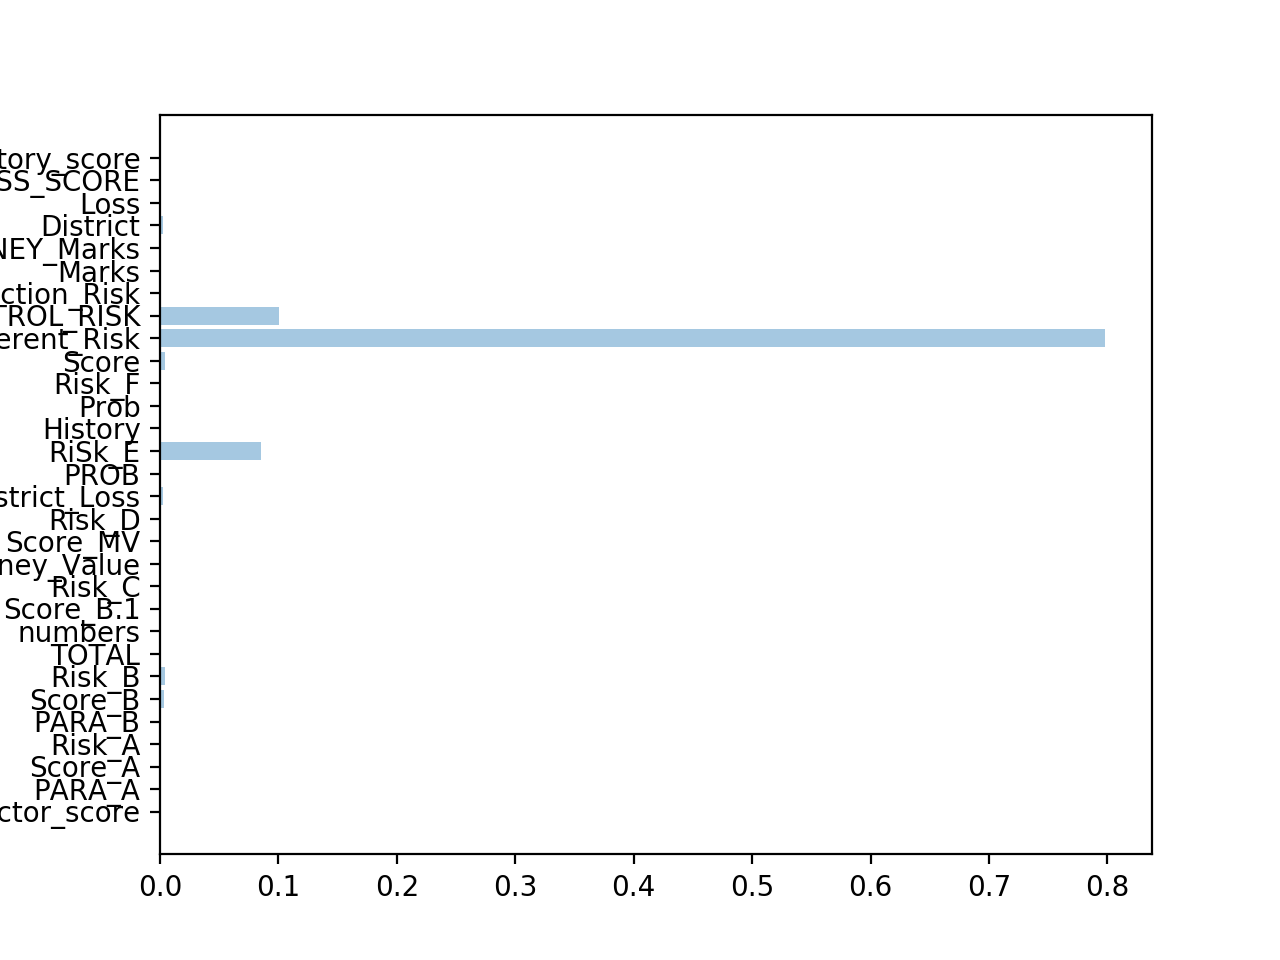

([<matplotlib.axis.YTick at 0x121ceaf60>,
 <a list of 30 Text yticklabel objects>)

In [46]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

y_list = gbrt.feature_importances_
y_pos = np.arange(len(y_list))
features = X.columns
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

we can see the details of feature importances from the  above plot.

Apply PCA for the data and run the models again:

In [37]:
pca = PCA(n_components= 0.95, random_state = 0)

#train pca model
pca.fit(X_train)

#transforming X_train and X_test
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

In [50]:
from sklearn.linear_model import LogisticRegression
c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train_reduced, y_train)
    log_l2.fit(X_train_reduced, y_train)
    train_score_l1.append(log_l1.score(X_train_reduced, y_train))
    train_score_l2.append(log_l2.score(X_train_reduced, y_train))
    test_score_l1.append(log_l1.score(X_test_reduced, y_test))
    test_score_l2.append(log_l2.score(X_test_reduced, y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

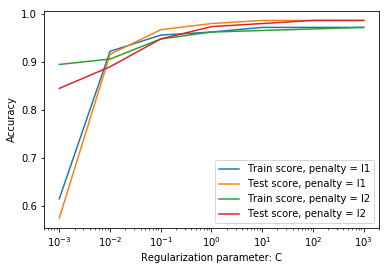

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

In [53]:
print(log_l1.score(X_train_reduced, y_train))
print(log_l2.score(X_train_reduced, y_train))
print(log_l1.score(X_test_reduced, y_test))
print(log_l2.score(X_test_reduced, y_test))

0.9725806451612903
0.9725806451612903
0.9870967741935484
0.9870967741935484


In [ ]:
#0.9983870967741936
#0.9935483870967742
#0.9870967741935484
#0.9870967741935484

From the train and test scores we can conclude that after using PCA components, the accuracy scores of the logistic regression models don't change much. 

In [55]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train_reduced, y_train)
    train_score_array.append(knn.score(X_train_reduced, y_train))
    test_score_array.append(knn.score(X_test_reduced, y_test))

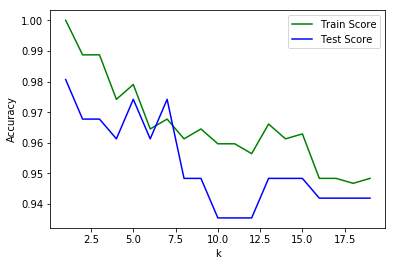

In [56]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

In [58]:
knn = KNeighborsClassifier(1)
knn.fit(X_train_reduced, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train_reduced, y_train)))
print('Train score: {:.4f}'.format(knn.score(X_test_reduced, y_test)))

Train score: 1.0000
Train score: 0.9806


In [ ]:
#Train score: 1.0000
#Train score: 0.9806

Compared to the results of K-neighbors classification algorithm in project1, we don't change the choice of neighbors number and get almost the same test score of model when specify the parameter.

In [59]:
from sklearn.svm import SVC, LinearSVC

In [63]:
print("Size of training set: {}   size of test set: {}".format(X_train_reduced.shape[0], X_test_reduced.shape[0]))

best_score = 0

for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    # for each combination of parameters, train an SVC
    clf = LinearSVC(C=C)
    clf.fit(X_train_reduced,y_train)
    # evaluate the SVC on the test set
    score = clf.score(X_test_reduced, y_test)
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameters = {'C': C}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 620   size of test set: 155
Best score: 0.99
Best parameters: {'C': 100}


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
#Size of training set: 620   size of test set: 155
#Best score: 0.99
#Best parameters: {'C': 100}

Compared to the LinearSVC in project1, the LinearSVC model after applied PCA has the same best parameter and the same best score.

In [62]:
print("Size of training set: {}   size of test set: {}".format(X_train_reduced.shape[0], X_test_reduced.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        clf = SVC(kernel='rbf',gamma=gamma, C=C)
        clf.fit(X_train_reduced,y_train)
        # evaluate the SVC on the test set
        score = clf.score(X_test_reduced, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 620   size of test set: 155
Best score: 0.99
Best parameters: {'C': 100, 'gamma': 10}


In [ ]:
#Size of training set: 620   size of test set: 155
#Best score: 0.99
#Best parameters: {'C': 10, 'gamma': 10}

Compared to the SVC model with the kernal equal to rbf in the project1, we can see although the best score doesn't change when apply the reduced data, the best parameter changes. The regularization term C changes from 10 to 100.

In [64]:
print("Size of training set: {}   size of test set: {}".format(X_train_reduced.shape[0], X_test_reduced.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        clf = SVC(kernel='linear',gamma=gamma, C=C)
        clf.fit(X_train_reduced,y_train)
        # evaluate the SVC on the test set
        score = clf.score(X_test_reduced, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 620   size of test set: 155
Best score: 0.99
Best parameters: {'C': 100, 'gamma': 0.001}


In [ ]:
#Results from project1
#Size of training set: 620   size of test set: 155
#Best score: 0.99
#Best parameters: {'C': 10, 'gamma': 0.001}

Compared to the SVC model with the kernal equal to linear in the project1, we can see although the best score doesn't change when apply the reduced data, the best parameter changes. The regularization term C changes from 10 to 100.

In [65]:
print("Size of training set: {}   size of test set: {}".format(X_train_reduced.shape[0], X_test_reduced.shape[0]))

best_score = 0

for gamma in [0.1, 1, 10]:
    for C in [0.1, 1, 10]:
        # for each combination of parameters, train an SVC
        clf = SVC(kernel='poly',gamma=gamma, C=C)
        clf.fit(X_train_reduced,y_train)
        # evaluate the SVC on the test set
        score = clf.score(X_test_reduced, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 620   size of test set: 155
Best score: 0.98
Best parameters: {'C': 1, 'gamma': 10}


In [ ]:
#Size of training set: 620   size of test set: 155
#Best score: 0.99
#Best parameters: {'C': 1, 'gamma': 100}

Compared to the SVC model with the kernal equal to poly in the project1, we can see although the best score doesn't change when apply the reduced data, the best parameter changes. The gamma changes from 100 to 10.

In [66]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=4, random_state=0)
dtree.fit(X_train_reduced, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_reduced, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_reduced, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.974


In [ ]:
#Results from project1
#Accuracy on training set: 0.997
#Accuracy on test set: 0.987

From the comparison above we can see the model using PCA data get a lightly lower test score of the Decision Tree Classification algorithm.

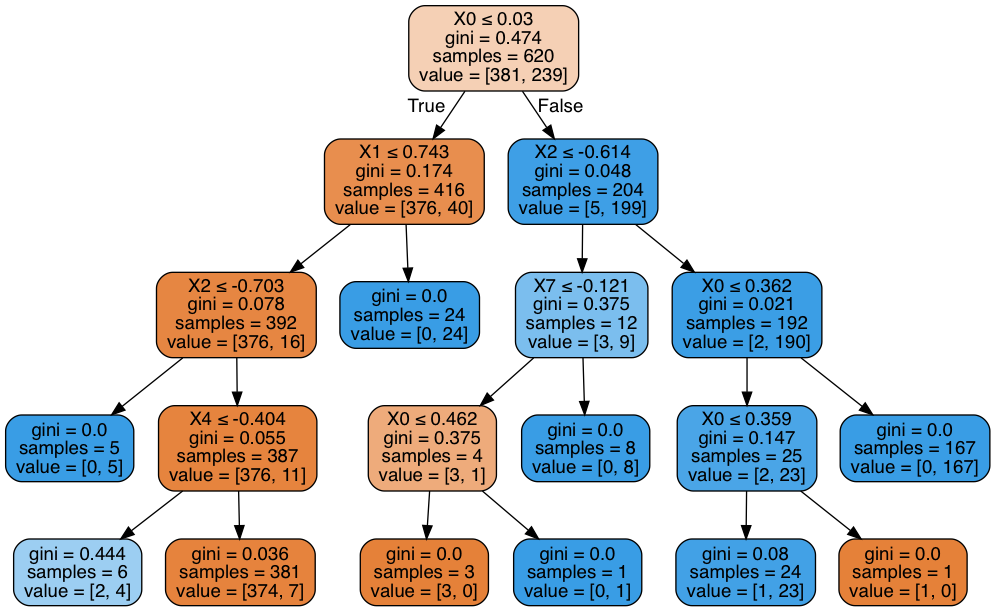

In [69]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Above tree visualization shows the details about the decision trees using reduced data.

Deep learning models:

In [32]:
%matplotlib inline
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

In [33]:
X_train.shape

(620, 30)

We built the neural network model below. We set one hidden layer and one output layer. After 20 ephochs, we got the accuracy of 0.8694. For the model evaluation part, we got the test score of 87%, which is a really good score.

In [34]:
# step 1: build the model
model = Sequential()
model.add(Dense(10, input_dim = 30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [73]:
# step 2: compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [74]:
# step 3: train the model
model.fit(X_train, y_train, batch_size=150, epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
620/620 [==============================] - 0s 329us/sample - loss: 0.7045 - acc: 0.4984
Epoch 2/20
620/620 [==============================] - 0s 14us/sample - loss: 0.6900 - acc: 0.5597
Epoch 3/20
620/620 [==============================] - 0s 22us/sample - loss: 0.6793 - acc: 0.5645
Epoch 4/20
620/620 [==============================] - 0s 15us/sample - loss: 0.6702 - acc: 0.5435
Epoch 5/20
620/620 [==============================] - 0s 16us/sample - loss: 0.6616 - acc: 0.5839
Epoch 6/20
620/620 [==============================] - 0s 19us/sample - loss: 0.6533 - acc: 0.6081
Epoch 7/20
620/620 [==============================] - 0s 16us/sample - loss: 0.6453 - acc: 0.5984
Epoch 8/20
620/620 [==============================] - 0s 17us/sample - loss: 0.6376 - acc: 0.5839
Epoch 9/20
620/620 [==============================] - 0s 18us/sample - loss: 0.6301 - acc: 0.5855
Epoch 10/20
620/620 [==============================] - 0s 19us/sample

In [75]:
# Step 4: Model evaluation


loss_and_metrics = model.evaluate(X_test, y_test)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

155/155 [==============================] - 0s 400us/sample - loss: 0.5441 - acc: 0.8710
Test Loss 0.5441156554606653
Test Accuracy 0.87096775


Below are the predictions of test dataset using our deep learning model. We could use these predict probabilities to assign label to data. And we could set the threshold as we want according to the preference of precision/recall scores.

In [76]:
model.predict(X_test)

array([[0.6048913 ],
       [0.63870573],
       [0.6702162 ],
       [0.469198  ],
       [0.48353165],
       [0.586576  ],
       [0.87038994],
       [0.4832977 ],
       [0.48311415],
       [0.76761854],
       [0.6475826 ],
       [0.61415607],
       [0.48346406],
       [0.48520005],
       [0.5838614 ],
       [0.46889448],
       [0.4839632 ],
       [0.4834659 ],
       [0.6450635 ],
       [0.62294894],
       [0.89571524],
       [0.48328286],
       [0.60563296],
       [0.51036924],
       [0.6270653 ],
       [0.5735853 ],
       [0.4683988 ],
       [0.4692387 ],
       [0.61438245],
       [0.47319278],
       [0.83565265],
       [0.47319278],
       [0.4832998 ],
       [0.8181343 ],
       [0.83888435],
       [0.5066632 ],
       [0.5043315 ],
       [0.53141665],
       [0.6025466 ],
       [0.61616737],
       [0.46960357],
       [0.4683988 ],
       [0.4686157 ],
       [0.5126014 ],
       [0.7663804 ],
       [0.48342773],
       [0.4833228 ],
       [0.641

In [78]:
# step 1: build the model
model1 = Sequential()
#input leyer
model1.add(Dense(10, input_dim = 30, activation = 'relu'))
#hidden layer
model1.add(Dense(5, activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

# step 2: build the computational graph - compile
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

# step 3: train the model
model1.fit(X_train, y_train, epochs = 20, batch_size = 100)

Epoch 1/20
620/620 [==============================] - 0s 379us/sample - loss: 0.6613 - acc: 0.7855
Epoch 2/20
620/620 [==============================] - 0s 22us/sample - loss: 0.6449 - acc: 0.8032
Epoch 3/20
620/620 [==============================] - 0s 27us/sample - loss: 0.6295 - acc: 0.8532
Epoch 4/20
620/620 [==============================] - 0s 25us/sample - loss: 0.6136 - acc: 0.8565
Epoch 5/20
620/620 [==============================] - 0s 26us/sample - loss: 0.5971 - acc: 0.9065
Epoch 6/20
620/620 [==============================] - 0s 21us/sample - loss: 0.5807 - acc: 0.9242
Epoch 7/20
620/620 [==============================] - 0s 25us/sample - loss: 0.5646 - acc: 0.9274
Epoch 8/20
620/620 [==============================] - 0s 28us/sample - loss: 0.5476 - acc: 0.9290
Epoch 9/20
620/620 [==============================] - 0s 19us/sample - loss: 0.5304 - acc: 0.9387
Epoch 10/20
620/620 [==============================] - 0s 29us/sample - loss: 0.5129 - acc: 0.9371
Epoch 11/20
620/62

In [80]:
# Step 4: Model evaluation
loss_and_metrics = model1.evaluate(X_test, y_test)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

155/155 [==============================] - 0s 473us/sample - loss: 0.3387 - acc: 0.9484
Test Loss 0.33865910922327347
Test Accuracy 0.9483871


Above is the second deep learning model we implemented. For this time we added a hidden layer and set the batch_size as 100. After 20 epochs we got the accuracy of 0.9387, which is higher than the last model. We evaluated the model and got the test accuracy of 0.9484. So we can conclude that this model looks better than the last one. We added a hidden layer and we improved our predict accuracy.